# Let's look at limits!

In [1]:
from geogebra.ggb import *

ggb = GGB()

import sympy as sy
x, y, z = sy.symbols('x y z')
sy.init_printing(use_unicode=True)

<IPython.core.display.Javascript object>

Here's the graph of a function. Notice how the $y$ values change as we drag $x$. At what points does the limit fail to exist?

In [2]:
ggb.material('pahq4ff7').draw()

<IPython.core.display.Javascript object>

## An algebraic limit


Consider the following example:

$$\lim_{x\to 2}\frac{x^2-5x+6}{x^2-4} = -\frac14$$

Why is this true? First, look at the graph:

In [3]:
ggb.material('rnajzfgq').draw()

<IPython.core.display.Javascript object>

Next, we can ask the computer to do it.

In [4]:
def f(x):
    return (x**2-5*x+6)/(x**2-4)

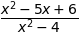

In [5]:
f(x)

In [6]:
sy.limit(f(x),x,2)

All signs seem to point to a limit of $-\frac14$. But how do we see this for ourselves?

First, notice that a limit is necessary here: $f(2)$ is undefined. If we try to put $x=2$, we get the nonsensical result of $\frac00$. But this is a rational function: the top and bottom are both polynomials.

One thing we know about a polynomial $p(x)$ is that if $p(a)=0$, then $(x-a)$ is a factor!

So let's try to factor the top and bottom:

$$f(x) = \frac{x^2-5x+6}{x^2-4} = \frac{(x-2)(x-3)}{(x-2)(x+2)}$$

Now we can see it: there's a factor of $x-2$ on the top and bottom; this is what was causing those zeros.

Next, you're probably tempted to cancel the $x-2$ factors and proceed. But it would be **false** to write $f(x)=\dfrac{x-3}{x+2}$, because we know $f(2)$ is undefined, but the right hand side makes perfect sense when $x=2$. This is an equality that is valid for all values of $x$ except $x=2$.

Here's where limits come to the rescue! Remember that in the expression $\displaystyle \lim_{x\to 2}f(x)$, we are considering values of $x$ that are close to 2, *but not equal to 2*. Since we don't let $x=2$, we're allowed to cancel, and after that, the properties of limits take over:

$$\lim_{x\to 2}f(x) = \lim_{x\to 2}\frac{x^2-5x+6}{x^2-4} = \lim_{x\to 2}\frac{x-3}{x+2} = \frac{\lim_{x\to 2}(x-3)}{\lim_{x\to 2}(x+2)} = \frac{2-3}{2+2} = -\frac14,$$

just as we expected.

## A trigonometric limit

Next, we're going to explore the limit

$$\lim_{x\to 0}\dfrac{\sin(x)}{x}.$$

Like the last example, trying to evaluate directly results in $\frac00$.

Unlike the last example, we cannot simply factor an $x$ out from the top to cancel it.

To get an idea of what we're dealing with, we'll first explore numerically and graphically, using some borrowed code. (Thanks, Vincent)

Let's start by defining our function.

In [7]:
def g(x):
    return sy.sin(x)/x

Let's confirm that this is what we want by asking Jupyter to display the function.

In [8]:
g(x)

Next, let's enter some test values for our function near $x=0$, and add some code to produce the corresponding $y$ values.

In [9]:
Xvalues = [0.5,-0.5,0.1,-0.1,0.01,-0.01,0.001,-0.001]
resultArray = []

for values in Xvalues:
    resultArray.append([str(values), g(values)])
    
print("values for f(x) = sin(x)/x")
print("x", " "*6, "| Results")
print("-"*28)
for result in resultArray:
    print (result[0], " "*(7 - len(result[0])), "|", result[1])

values for f(x) = sin(x)/x
x        | Results
----------------------------
0.5      | 0.958851077208406
-0.5     | 0.958851077208406
0.1      | 0.998334166468282
-0.1     | 0.998334166468282
0.01     | 0.999983333416666
-0.01    | 0.999983333416666
0.001    | 0.999999833333342
-0.001   | 0.999999833333342


Next, let's look at the graph.

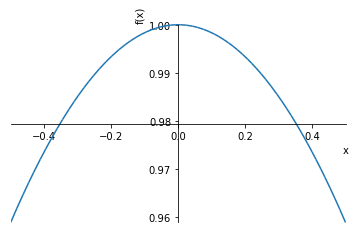

In [10]:
graph = sy.plot(g(x), (x, -0.5, 0.5))

Finally, we can use Python to simply compute the limit:

In [11]:
sy.limit(g(x),x,0)

So, how do we see this is true? Consider the following diagram. The length of the first vertical line (in blue), is $\sin(x)$. The length of the circular arc (in red), is $x$, and the length of the second vertical line (in green) is $\tan(x)$.

In [12]:
ggb.material('vrfvagcx').draw()

<IPython.core.display.Javascript object>

We see that for all values of $x> 0$, we have

$$\sin(x)\leq x\leq \tan(x).$$

Taking reciprocals, and noting $\tan(x) = \dfrac{\sin(x)}{\cos(x)}$, we get

$$\frac{\cos(x)}{\sin(x)} \leq \frac1x\leq \frac{1}{\sin(x)}$$.

Finally, we multiply the whole thing by $\sin(x)$ (which is positive here), to get

$$\cos(x) \leq \frac{\sin(x)}{x}\leq 1,$$

and this is true for any $x>0$. (With a bit more work, the same inequality holds for $x<0$.)

Now we can ask: what happens when we let $x\to 1$?

In [13]:
ggb.material('cucrrvqg').draw()

<IPython.core.display.Javascript object>

Here are some exercises:
- Standard 1.1: Sketch a graph of a function $f$ with the following features:
    * $\displaystyle \lim_{x\to 1}f(x)$ exists, but $f(1)$ is undefined.
    * $f(2)$ is defined, but $\displaystyle \lim_{x\to 2}f(x)$ does not exist.
- Standard 1.2: Let $f(x)=x^2-2x+4$. Using only the limit properties (Theorem 1.3.1 in the text) show that $\displaystyle \lim_{x\to a}f(x) = f(a)$ for any real number $a$.
- Standard 1.3: Evaluate both of the following limits. (You can ask for hints.)
$$\lim_{x\to 1}\frac{x^2-2x+1}{x^3-x} \quad \text{ and } \quad \lim_{x\to 4}\frac{\sqrt{x}-2}{x^2-5x+4}$$
- Standard 1.4: Evaluate both of the following limits:$$\lim_{x\to 0}\frac{\tan(5x)}{x} \quad \text{ and } \quad \lim_{x\to 0} \frac{1-\cos(x)}{x^2}$$
- Standard 1,5: Given $f(x) = \begin{cases} \ln(x-1) & \text{ if } x\geq 2\\1-x^2 & \text{ if } x<2\end{cases}$, evaluate
$\displaystyle \lim_{x\to 2^-}f(x)$, $\displaystyle \lim_{x\to 2^+}f(x)$, $\displaystyle \lim_{x\to 2}f(x)$, and $f(2)$.